In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML
import optuna

from PSO import PSO

%matplotlib inline

In [2]:
# パラメーター ----------------------------------------------------------
N = 2   # 次元
function_number = 2   # 課題の関数の番号
num_agent = 100   # agentの数
max_turn = 100   # 最大ターン数
w = 0.5
c1 = 0.03
c2 = 0.03
# ---------------------------------------------------------------------

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]

pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, w, c1, c2, output_mode = False)


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 100, 'w': 0.5, 'c1': 0.03, 'c2': 0.03}
gb_place : [ 0.02349423 -0.00470036]
gb_score : 0.11369332581653246
計算時間 : 207 ms



緑 : Agent
赤 : 最小地点


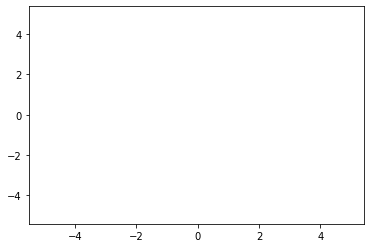

In [3]:
image_list = []
fig = plt.figure()

print("緑 : Agent")
print("赤 : 最小地点")

for turn in range(max_turn) : 
    L = []
    for place in pso.agent_place_list[turn] : 
        L.append([place[0], place[1], "green"])
    for gb in pso.gb_record_list[turn] : 
        L.append([gb[0], gb[1], "red"])
        
    df = pd.DataFrame(data=L, columns=['x', 'y', 'kind'])
    
    image = plt.scatter(x = df["x"], y = df["y"], c = df["kind"])
    image_list.append([image])
    
movie = animation.ArtistAnimation(fig, image_list, interval=500)
HTML(movie.to_jshtml())